In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
admissions_df = pd.read_csv('patient_admissions_details.csv')
disease_prevalence_df = pd.read_csv("disease_prevalence_by_age_gender.csv")

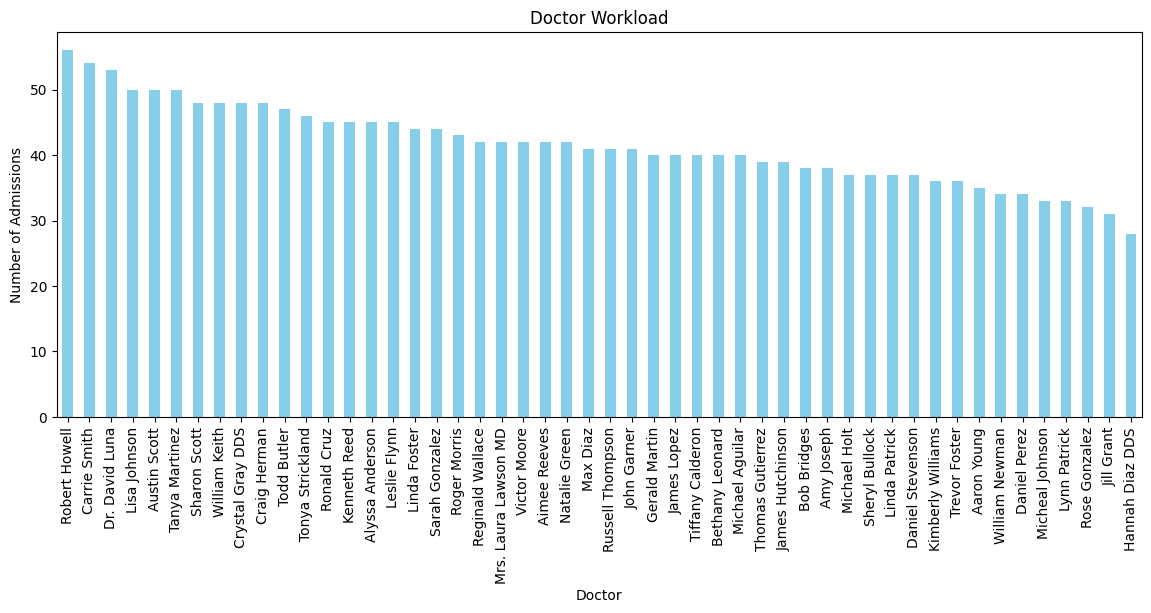

In [5]:
# Doctor Workload Analysis
doctor_workload = admissions_df['doctor_name'].value_counts()
plt.figure(figsize=(14, 5))
doctor_workload.plot(kind='bar', title='Doctor Workload', color='skyblue')
plt.xlabel('Doctor')
plt.ylabel('Number of Admissions')
plt.show()

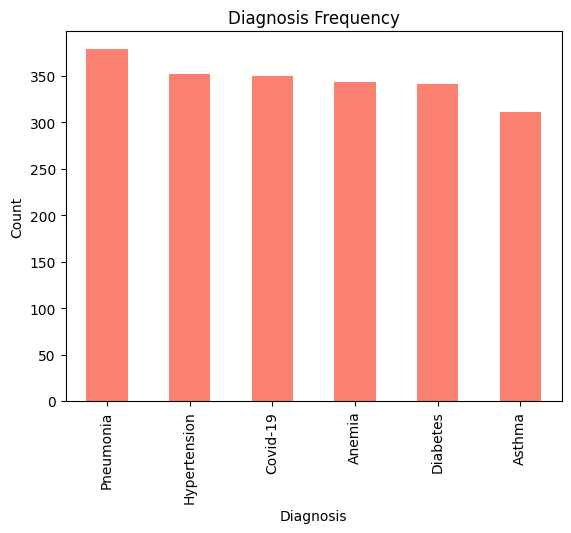

In [6]:
diagnosis_count = admissions_df['diagnosis'].value_counts()
diagnosis_count.plot(kind='bar', title='Diagnosis Frequency', color='salmon')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

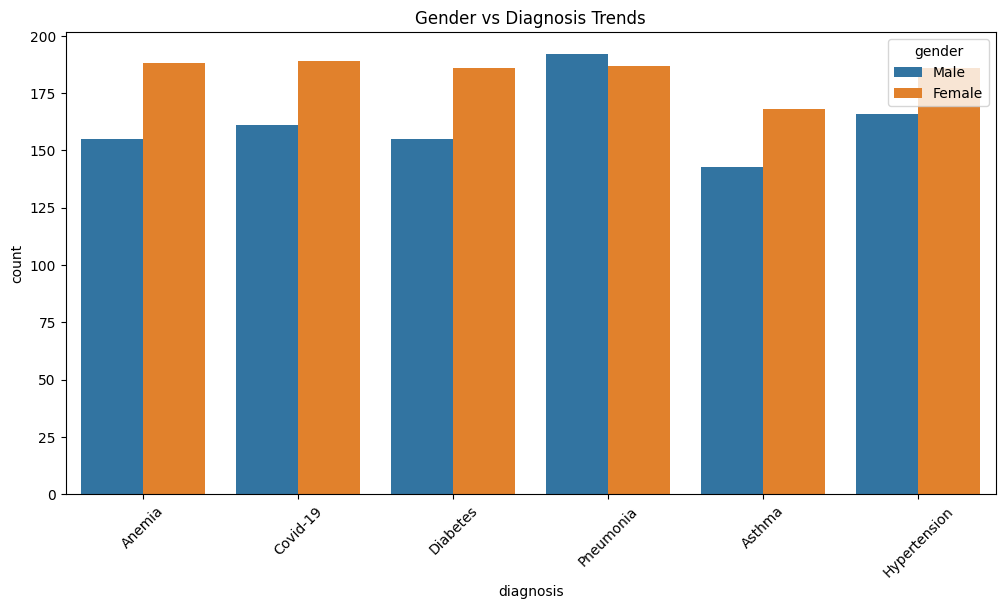

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data=admissions_df, x='diagnosis', hue='gender')
plt.title('Gender vs Diagnosis Trends')
plt.xticks(rotation=45)
plt.show()

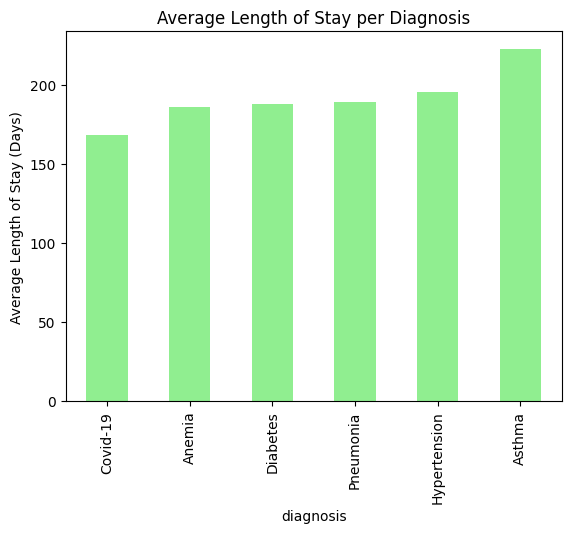

In [8]:
admissions_df['admission_date'] = pd.to_datetime(admissions_df['admission_date'])
admissions_df['discharge_date'] = pd.to_datetime(admissions_df['discharge_date'])
admissions_df['length_of_stay'] = (admissions_df['discharge_date'] - admissions_df['admission_date']).dt.days
avg_length_of_stay = admissions_df.groupby('diagnosis')['length_of_stay'].mean().sort_values()
avg_length_of_stay.plot(kind='bar', title='Average Length of Stay per Diagnosis', color='lightgreen')
plt.ylabel('Average Length of Stay (Days)')
plt.show()

In [10]:
avg_length_of_stay = admissions_df.groupby('diagnosis')['length_of_stay'].mean().sort_values()
avg_length_of_stay

diagnosis
Covid-19        168.031429
Anemia          185.857143
Diabetes        187.797654
Pneumonia       188.804749
Hypertension    195.051136
Asthma          222.463023
Name: length_of_stay, dtype: float64

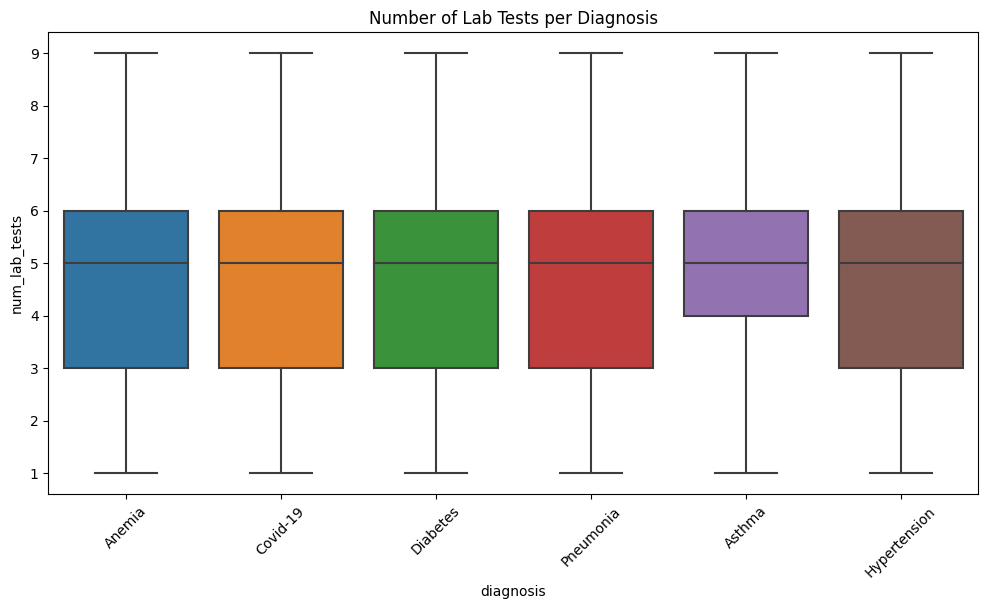

In [11]:
# Lab Tests Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=admissions_df, x='diagnosis', y='num_lab_tests')
plt.title('Number of Lab Tests per Diagnosis')
plt.xticks(rotation=45)
plt.show()

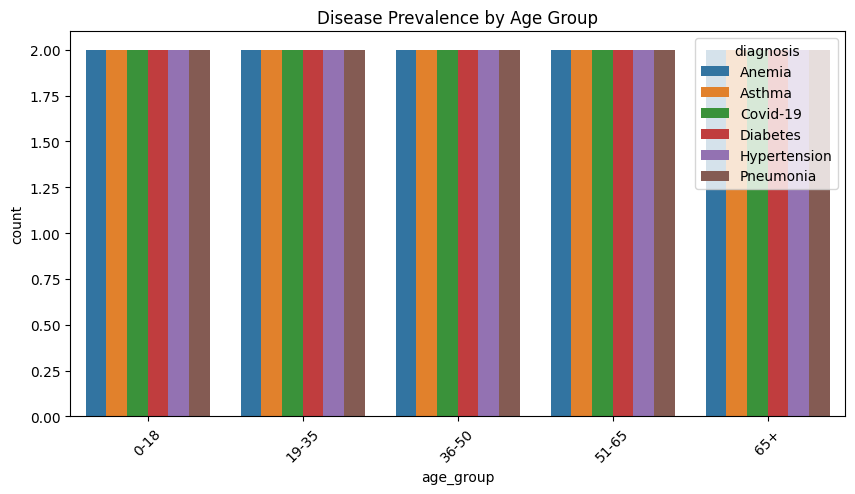

In [14]:
# Age Group Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=disease_prevalence_df, x='age_group', hue='diagnosis')
plt.title('Disease Prevalence by Age Group')
plt.xticks(rotation=45)
plt.show()

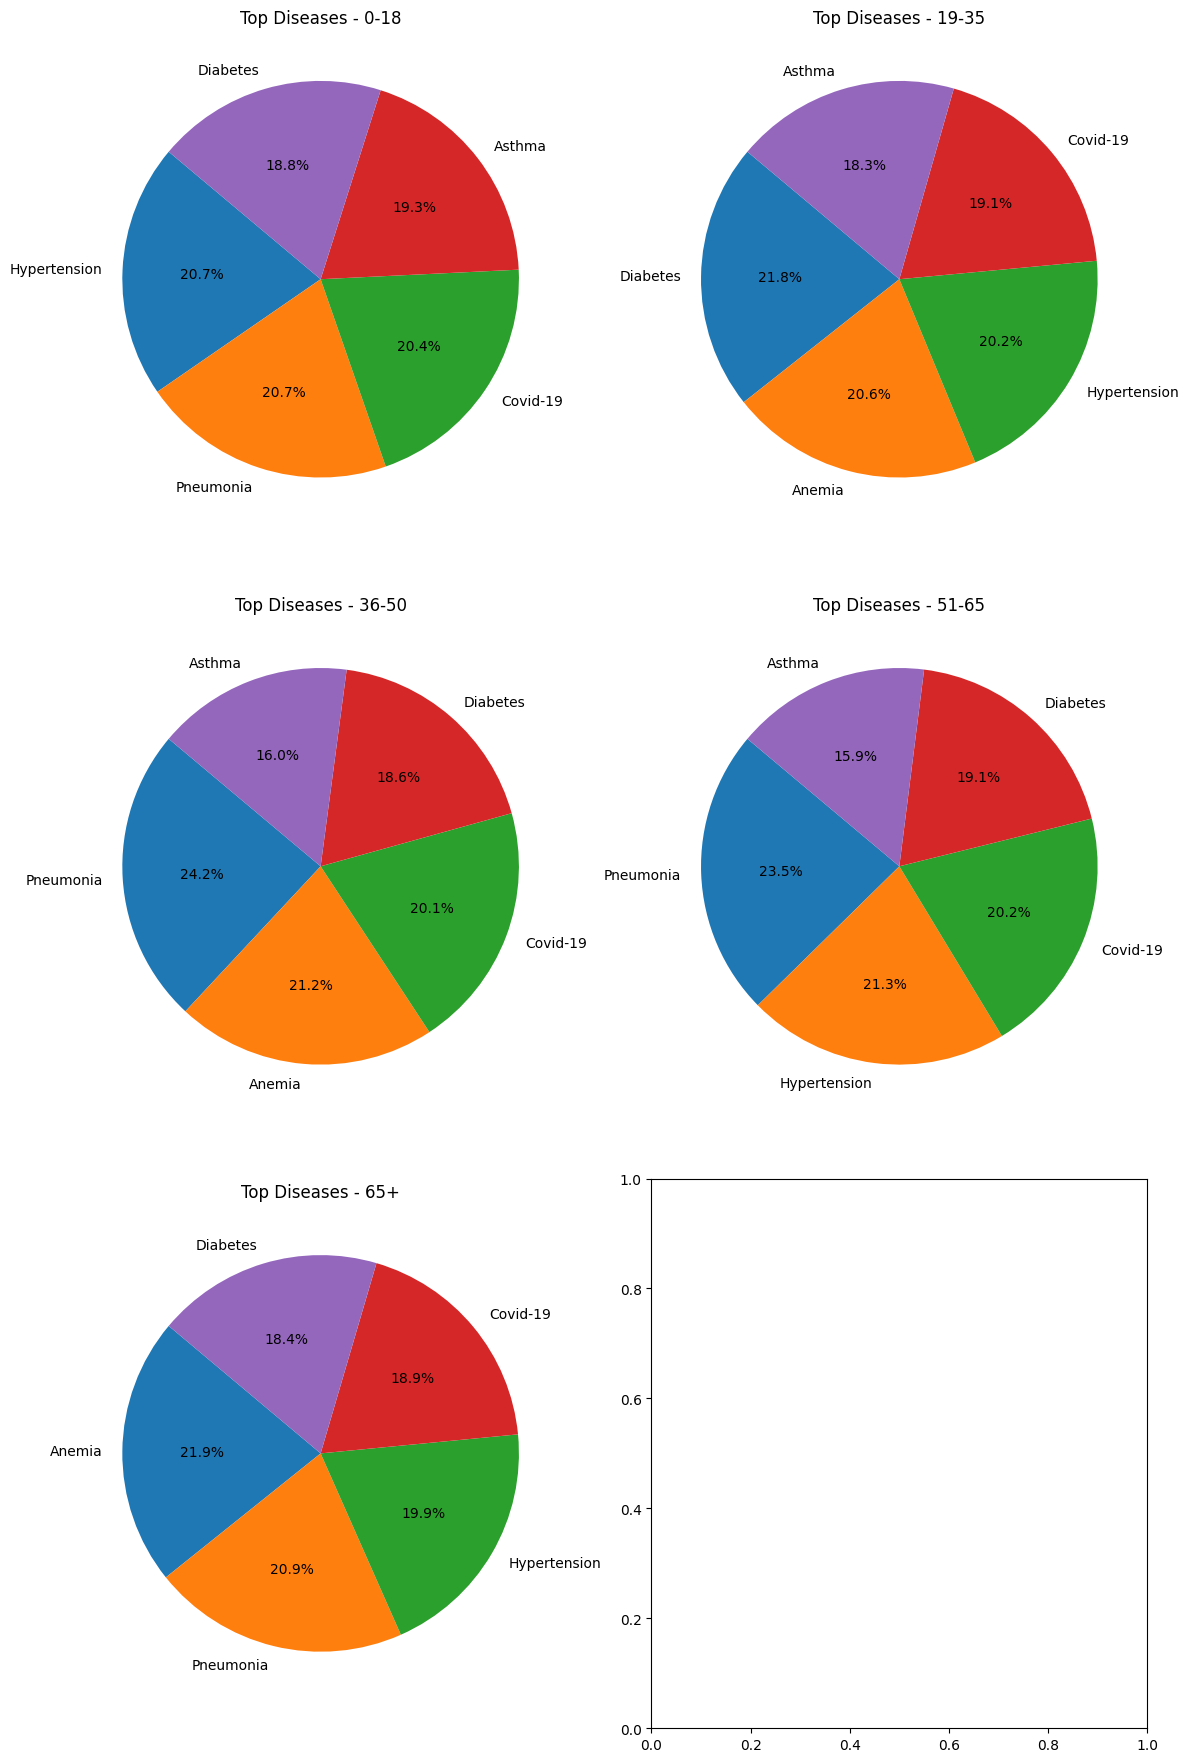

In [23]:
# Top Diseases by Age Group - Pie Chart Subplots
unique_age_groups = disease_prevalence_df['age_group'].unique()
n_cols = 2
n_rows = (len(unique_age_groups) + 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
axes = axes.flatten()

for i, age_group in enumerate(unique_age_groups):
    subset = disease_prevalence_df[disease_prevalence_df['age_group'] == age_group]
    top_diseases = subset.groupby('diagnosis')['prevalence_count'].sum().nlargest(5)
    axes[i].pie(top_diseases, labels=top_diseases.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Top Diseases - {age_group}')

plt.tight_layout()
plt.show()

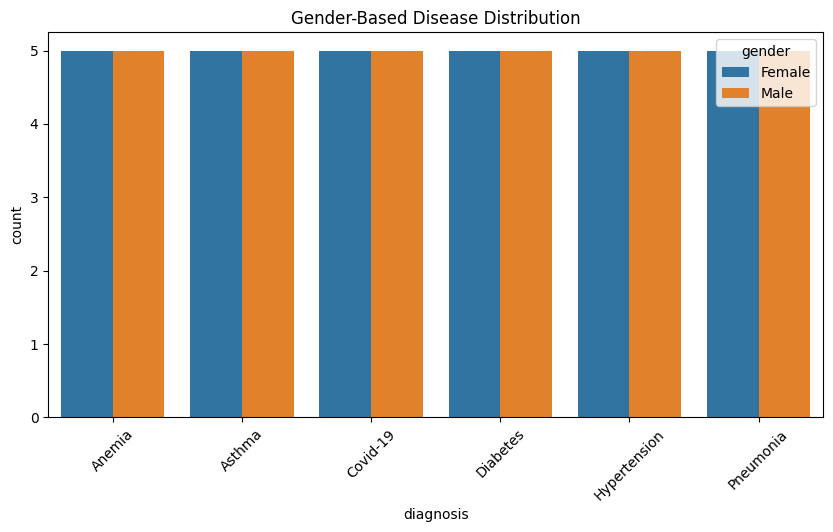

In [15]:
# Gender-Based Disease Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=disease_prevalence_df, x='diagnosis', hue='gender')
plt.title('Gender-Based Disease Distribution')
plt.xticks(rotation=45)
plt.show()

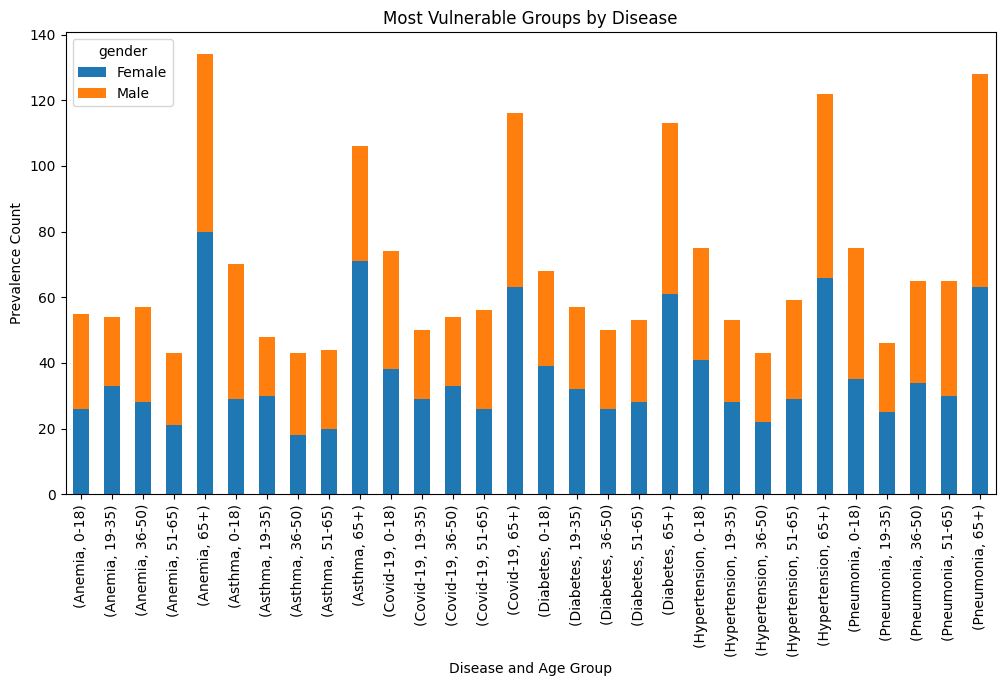

In [18]:
vulnerable_groups = disease_prevalence_df.groupby(['diagnosis', 'age_group', 'gender'])['prevalence_count'].sum().unstack().fillna(0)
vulnerable_groups.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Most Vulnerable Groups by Disease')
plt.xlabel('Disease and Age Group')
plt.ylabel('Prevalence Count')
plt.xticks(rotation=90)
plt.show()

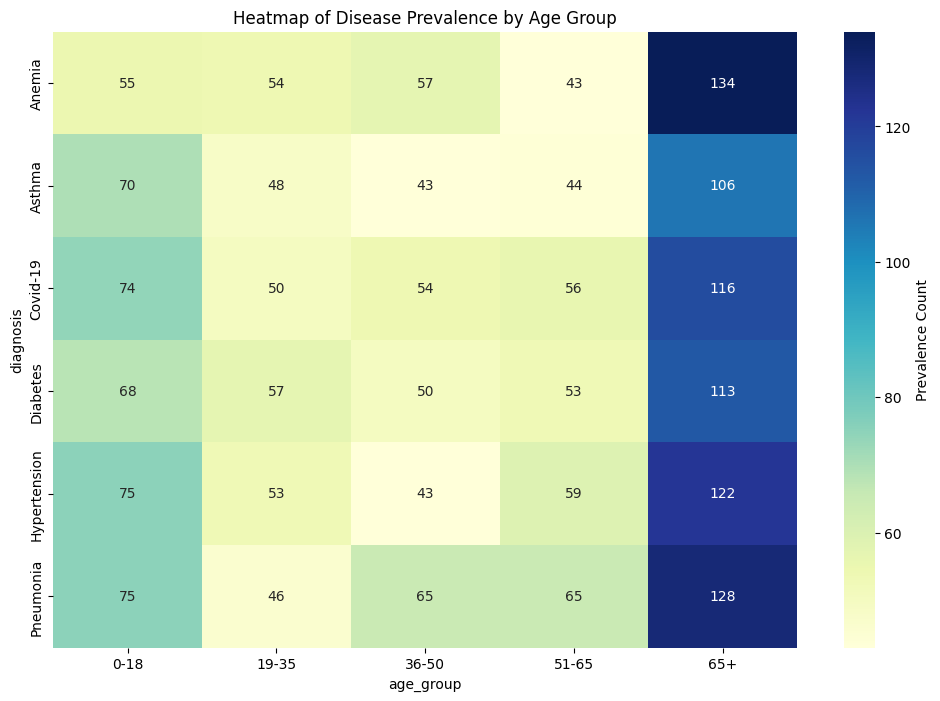

In [22]:
# Heatmap for Disease Trends
pivot_table = disease_prevalence_df.pivot_table(values='prevalence_count', index='diagnosis', columns='age_group', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, fmt='g', annot=True, cmap='YlGnBu', cbar_kws={'label': 'Prevalence Count'})
plt.title('Heatmap of Disease Prevalence by Age Group')
plt.show()